Model Building

Importing The Required Model Building Libraries

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Traning Datagenarator

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

Testing Datagenarator

In [7]:
test_datagen = ImageDataGenerator(rescale=1/255)

Training Dataset

In [8]:
x_train = train_datagen.flow_from_directory("C:\\Users\\hp\\Desktop\\Project\\training_set", target_size=(64,64),batch_size=300,class_mode='categorical', color_mode ="grayscale")

Found 15750 images belonging to 9 classes.


Testing Dataset

In [9]:
x_test = test_datagen.flow_from_directory("C:\\Users\\hp\\Desktop\\Project\\test_set", target_size=(64,64),batch_size=300, class_mode='categorical', color_mode ="grayscale")

Found 2250 images belonging to 9 classes.


In [10]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  53
Len x-test :  8


In [11]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [12]:
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

Model Creation

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [14]:
model=Sequential()

Add the convolution layer

In [15]:
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))

Add the pooling layer

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

Add the flatten layer

In [17]:
model.add(Flatten())

Adding the dense layer

In [18]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))

Compile the Model

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit the model

In [20]:
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)

C:\Users\hp\AppData\Local\Temp\ipykernel_8100\43643550.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)


Epoch 1/10
30/30 [==============================] - 248s 8s/step - loss: 0.7529 - accuracy: 0.7429 - val_loss: 0.3305 - val_accuracy: 0.9182
Epoch 2/10
30/30 [==============================] - 130s 4s/step - loss: 0.1735 - accuracy: 0.9513
Epoch 3/10
30/30 [==============================] - 233s 8s/step - loss: 0.0891 - accuracy: 0.9754
Epoch 4/10
30/30 [==============================] - 136s 4s/step - loss: 0.0479 - accuracy: 0.9879
Epoch 5/10
30/30 [==============================] - 136s 5s/step - loss: 0.0331 - accuracy: 0.9899
Epoch 6/10
30/30 [==============================] - 137s 4s/step - loss: 0.0290 - accuracy: 0.9917
Epoch 7/10
30/30 [==============================] - 137s 5s/step - loss: 0.0202 - accuracy: 0.9943
Epoch 8/10
30/30 [==============================] - 90s 3s/step - loss: 0.0132 - accuracy: 0.9964
Epoch 9/10
30/30 [==============================] - 90s 3s/step - loss: 0.0120 - accuracy: 0.9970
Epoch 10/10
30/30 [==============================] - 85s 3s/step - lo

Save the Model

In [21]:
model.save('aslpng1.h5')

Test the Model

Import the packages and load the saved model

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [23]:
model = load_model('aslpng1.h5')

Load the Test Image, Preprocess it and Predict

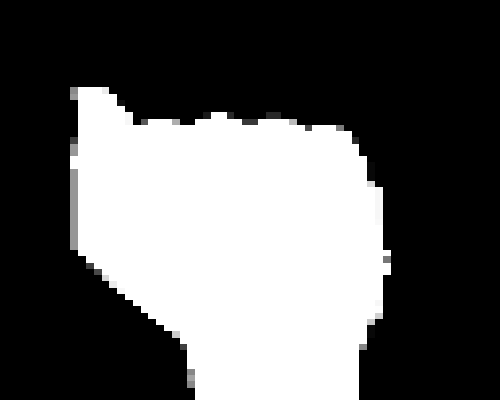

In [24]:
img=image.load_img('C:\\Users\\hp\\Desktop\\Project\\test_set\\A\\11.png',target_size=(400,500))
img

In [25]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("The Predicted Letter is ",op[pred])

In [26]:
img=image.load_img("C:\\Users\\hp\\Desktop\\Project\\test_set\\A\\20.png")
detect(img)

1/1 [==============================] - 3s 3s/step
The Predicted Letter is  A


In [27]:
img = image.load_img('C:\\Users\\hp\\Desktop\\Project\\test_set\\D\\45.png')
pred=detect(img)

1/1 [==============================] - 0s 116ms/step
The Predicted Letter is  D


In [28]:
img=image.load_img('C:\\Users\\hp\\Desktop\\Project\\test_set\\H\\4.png')
detect(img)

1/1 [==============================] - 0s 116ms/step
The Predicted Letter is  H


In [29]:
import numpy as np
import cv2
import os
from keras.models import load_model
from flask import Flask,render_template,Response
import tensorflow as tf
from gtts import gTTS
global graph
global writer
from skimage.transform import resize

In [31]:
graph=tf.compat.v1.get_default_graph()
writer = None
model=load_model('aslpng1.h5')
vals=['A','B','C','D','E','F','G','H','I']
app=Flask(__name__)
print("[INFO]accessing video stream...")
vs=cv2.VideoCapture(0)
pred=" "

[INFO]accessing video stream...


In [32]:
@app.route('/')
def index():
    return render_template('index.html')